# MNIST Single Layer Perceptron Classifier

## Content

Development Environment
<br/>Single Layer Perceptron Classifier

---

### Development Environment

In [ ]:
import os
import gzip
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

### Single Layer Perceptron Classifier

In [ ]:
def read_images(file_path, normalize=True):
  with gzip.open(file_path,'rb') as f:
    features = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    features =  features.reshape(-1, 784)

  if normalize:
    features = features.astype(np.float32)
    features = features / 255.0

  return features

def read_labels(file_path):
  with gzip.open(file_path, 'rb') as f:
    labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

  return labels

def data_preprocessor(mnist_dir_path='./'):
  train_images_path = os.path.join(mnist_dir_path + 'train-images-idx3-ubyte.gz') 
  train_labels_path = os.path.join(mnist_dir_path + 'train-labels-idx1-ubyte.gz')
  test_images_path = os.path.join(mnist_dir_path + 't10k-images-idx3-ubyte.gz')
  test_labels_path = os.path.join(mnist_dir_path + 't10k-labels-idx1-ubyte.gz')

  train_images = read_images(train_images_path)
  train_labels = read_labels(train_labels_path)
  test_images = read_images(test_images_path)
  test_labels = read_labels(test_labels_path)

  return train_images, train_labels, test_images, test_labels

def show_image(image, label):
  plt.title("Label : {}".format(str(label)))
  plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
  plt.show()

def one_hot_encoding(labels):
    one_hot_labels = np.zeros((labels.size, 10))
    for i in range(labels.size):
        one_hot_labels[i, labels[i]] = 1.0
    return one_hot_labels

def data_loader(train_images, train_labels, test_images, test_labels):
       
  split = len(test_images) # train:valid:test = 5:1:1
  valid_images, valid_labels = train_images[-split:], train_labels[-split:]
  train_images, train_labels = train_images[:-split], train_labels[:-split]
  
  train_labels = one_hot_encoding(train_labels)
  valid_labels = one_hot_encoding(valid_labels)
  test_labels = one_hot_encoding(test_labels)

  train_dataloader = [[i, j] for i, j in zip(train_images, train_labels)]
  valid_dataloader = [[i, j] for i, j in zip(valid_images, valid_labels)]
  test_dataloader = [[i, j] for i, j in zip(test_images, test_labels)]

  return train_dataloader, valid_dataloader, test_dataloader 

In [ ]:
class NeuralNetwork(object):
    def __init__(self, input_size, ouput_size):
        self.w = 0.2 * np.random.rand(input_size, ouput_size) - 0.1
        self.b = np.zeros(ouput_size)

    def forward(self, x):
        self.x = x
        output = np.dot(x, self.w) + self.b
        output = softmax(output)
        return output

    def backward(self, output, label, learning_rate):
        delta = output - label
        self.w -= learning_rate * np.outer(self.x, delta)
        self.b -= learning_rate * delta

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

def softmax(y):
    c = np.max(y)
    exp_a = np.exp(y - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
def train(model, train_dataloader, valid_dataloader):
    
    learning_rate = 0.1; epochs = 10; 
    early_stop = "pass";  # option: 'pass', 'stop'
    overfitting = "ignore" # option: 'check', 'ignore'
    best_valid_loss = -1

    for epoch in range(epochs):
        
        if early_stop == "pass":
          print("Epoch {}".format(epoch+1))

          training_loss = []
          for batch in tqdm(train_dataloader):
              image = batch[0]; label = batch[1]
              output = model.forward(image) 
              loss = mean_squared_error(output, label)
              training_loss.append(loss)
              model.backward(output, label, learning_rate)
          print("Training Loss : {}".format(np.mean(training_loss)))

          valid_loss = []; count = 0
          for batch in tqdm(valid_dataloader):
              image = batch[0]; label = batch[1]
              output = model.forward(image) 
              loss = mean_squared_error(output, label)
              valid_loss.append(loss)
              prediction = np.max(output)
              gold_label = np.max(label)
              if prediction == gold_label: count += 1

          accuarcy = count / len(label)
          epoch_valid_loss = np.mean(valid_loss)
          print("Validation Loss : {}".format(epoch_valid_loss))
          print("Validation Accuracy : {}\n".format(accuarcy))
          
          if overfitting == "check":
            if epoch == 0:
               best_valid_loss = epoch_valid_loss
               best_model = model
            elif epoch != 0: 
              if best_valid_loss >= epoch_valid_loss: 
                 best_valid_loss = epoch_valid_loss; best_model = model
                 early_stop = "pass"  
              elif best_valid_loss < epoch_valid_loss: early_stop = "stop" 
          elif overfitting == "ignore":
             best_model = model
        
        if early_stop == "stop":
           pass
             
    return best_model

def test(model, test_dataloader):
  print("Model Evaulation")
  count = 0
  for batch in tqdm(test_dataloader):
      image = batch[0]; label = batch[1]
      output = model.forward(image)

      prediction = np.argmax(output)
      gold_label = np.max(label)

      if prediction == gold_label:
        count += 1

  accuracy = count / len(test_images)
  print("Test Accuracy : {}".format(accuracy))

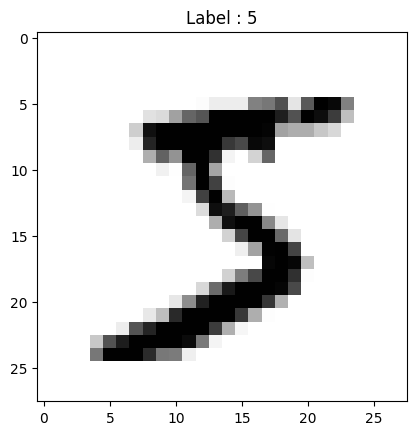

Epoch 1


100%|██████████| 50000/50000 [00:03<00:00, 14148.28it/s]


Training Loss : 0.1165832754465587


100%|██████████| 10000/10000 [00:00<00:00, 28011.20it/s]


Validation Loss : 0.09248985452233323
Validation Accuracy : 46.5

Epoch 2


100%|██████████| 50000/50000 [00:03<00:00, 14072.63it/s]


Training Loss : 0.10105227211461607


100%|██████████| 10000/10000 [00:00<00:00, 26879.53it/s]


Validation Loss : 0.09635369227756521
Validation Accuracy : 45.0

Epoch 3


100%|██████████| 50000/50000 [00:03<00:00, 12906.57it/s]


Training Loss : 0.09730983195305916


100%|██████████| 10000/10000 [00:00<00:00, 27395.33it/s]


Validation Loss : 0.08833496219000342
Validation Accuracy : 62.9

Epoch 4


100%|██████████| 50000/50000 [00:03<00:00, 13758.95it/s]


Training Loss : 0.09505149103804726


100%|██████████| 10000/10000 [00:00<00:00, 24814.04it/s]


Validation Loss : 0.09541733784147548
Validation Accuracy : 57.4

Epoch 5


100%|██████████| 50000/50000 [00:03<00:00, 14005.62it/s]


Training Loss : 0.09310320273141512


100%|██████████| 10000/10000 [00:00<00:00, 16556.33it/s]


Validation Loss : 0.10081970990437641
Validation Accuracy : 56.7

Epoch 6


100%|██████████| 50000/50000 [00:03<00:00, 12502.28it/s]


Training Loss : 0.09255142936070158


100%|██████████| 10000/10000 [00:00<00:00, 22124.03it/s]


Validation Loss : 0.09337401259952909
Validation Accuracy : 56.7

Epoch 7


100%|██████████| 50000/50000 [00:04<00:00, 12121.22it/s]


Training Loss : 0.09159738671573886


100%|██████████| 10000/10000 [00:00<00:00, 26809.73it/s]


Validation Loss : 0.09776932437034798
Validation Accuracy : 64.7

Epoch 8


100%|██████████| 50000/50000 [00:03<00:00, 13207.51it/s]


Training Loss : 0.09051283493802671


100%|██████████| 10000/10000 [00:00<00:00, 25641.24it/s]


Validation Loss : 0.09777693368728332
Validation Accuracy : 63.7

Epoch 9


100%|██████████| 50000/50000 [00:03<00:00, 12651.81it/s]


Training Loss : 0.0900745618607145


100%|██████████| 10000/10000 [00:00<00:00, 26593.74it/s]


Validation Loss : 0.09335346434583969
Validation Accuracy : 73.4

Epoch 10


100%|██████████| 50000/50000 [00:04<00:00, 11924.65it/s]


Training Loss : 0.08887131139153087


100%|██████████| 10000/10000 [00:00<00:00, 22573.58it/s]


Validation Loss : 0.09343213453170494
Validation Accuracy : 67.8

Model Evaulation


100%|██████████| 10000/10000 [00:00<00:00, 29326.00it/s]

Test Accuracy : 0.1202


In [2]:
if __name__ == "__main__":

  mnist_dir_path = './'
  train_images, train_labels, test_images, test_labels = data_preprocessor(mnist_dir_path)
  train_dataloader, valid_dataloader, test_dataloader = data_loader(train_images, train_labels, 
                                                                    test_images, test_labels)
  show_image(train_images[0], train_labels[0])
  
  model = NeuralNetwork(784, 10)
  model = train(model, train_dataloader, valid_dataloader)
  result = test(model, test_dataloader)

<br>

### Reference

<b>Data</b>
<br>[MNIST (Original)](http://yann.lecun.com/exdb/mnist/)
<br>[MNIST (Hugginface)](https://huggingface.co/datasets/ylecun/mnist)

<br><b>Source Code</b>
<br>[Google Colab](https://colab.research.google.com/drive/13GedG2V1iAFzDfotNF5xeuA3SXqlJK2s)